# Projet de cryptanalyse
## I Cryptanalyse de A5/2
### Q1

In [1]:
#on crée l'anneaux des polynomes
A.<x>=PolynomialRing(GF(2))

#mis à jour du registre R
'''
R : le rigistre sous forme de liste
P : P le polynome de retroaction
'''
def simule(R,P):
    PL=P.list()
    l=len(R)
    s=0
    for i in range(l):
        s=s+PL[l-i]*R[i]
    R.append(s)
    value=R.pop(0)
    return value, R

In [2]:
#fonction renvoyant la valeur binaire présente en mojorité parmi a,b,c
'''
a,b,c : les valeurs bianires à comparer
'''
def maj(a,b,c):
    r=int(a)+int(b)+int(c)
    if r>=2:
        return 1
    return 0

In [3]:
maj(GF(2)(1),GF(2)(1),GF(2)(0))

1

In [4]:
#fonction d'initialisation
'''
cette fontion necessite la création des registres et des polynomes de rétroactions au préalable
K : la clé (liste)
IV : le vecteur d'initialisation (liste)
'''
def a5_2_init(K,IV): 
    for i in range(64):
        #mise à jour des registres 
        simule(R1,P1)
        simule(R2,P2)
        simule(R3,P3)
        simule(R4,P4)
        #modification des registres
        R1[18]=R1[18]+K[i]
        R2[21]=R2[21]+K[i]
        R3[22]=R3[22]+K[i]
        R4[16]=R4[16]+K[i]
        
    for i in range(22):
        #mise à jour des registres 
        simule(R1,P1)
        simule(R2,P2)
        simule(R3,P3)
        simule(R4,P4)
        #modification des registres
        R1[18]=R1[18]+IV[i]
        R2[21]=R2[21]+IV[i]
        R3[22]=R3[22]+IV[i]
        R4[16]=R4[16]+IV[i]
    
    #on fixe à 1 certains bits des registres
    R1[3]=1
    R2[5]=1
    R3[4]=1
    R4[6]=1

    
#fonction de simulation d'un etape
'''
cette fontion necessite la création des registres et des polynomes de rétroactions au préalable
maj : la fonction à utiliser (fonction)
'''
def a5_2_step(maj):
    
    m=maj(R4[6],R4[13],R4[9])
    
    if R4[6]==m:
        simule(R1,P1)
    if R4[13]==m:
        simule(R2,P2)
    if R4[9]==m:
        simule(R3,P3)
    simule(R4,P4)
    
    y1=R1[0]+maj(R1[3],R1[4]+1,R1[6])
    y2=R2[0]+maj(R2[8],R2[5]+1,R2[12])
    y3=R3[0]+maj(R3[4],R3[9]+1,R3[6])
    
    return y1+y2+y3
    
    
    
#fonction de production de suite chiffrante à executer apres l'initialisation des registres
'''
cette fontion necessite la création des registres et des polynomes de rétroactions au préalable
N : la taille de la suite chiffrante (entier)
maj : fonction à utiliser (fonction)
'''
def a5_2_exec(N,maj):
    for i in range(99):
        a5_2_step(maj)
    L=[]
    for i in range(N):
        L.append(a5_2_step(maj))
    return L
    


#### Test

In [5]:
# suite chiffrante à obtenir
z_expected = Sequence([GF(2)(1), 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

#on définit la clef
K = Sequence([GF(2)(0), 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#on définit l'IV
IV = Sequence([GF(2)(1), 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#on définit les polynomes
P1 = x^19+x^18+x^17+x^14+1
P2 = x^22+x^21+1
P3 = x^23+x^22+x^21+x^8+1
P4 = x^17+x^12+1

#on définit les registers à 0
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise les registres
a5_2_init(K,IV)

#on génère la suite chiffrante
z=a5_2_exec(228,maj)

#on vérifie que l'on obtient le bon résultat
z==z_expected

True

### Q2

Voir rapport.

### Q3

In [6]:
#On définit l'ensemble des variables
BPR=BooleanPolynomialRing(64,'x')
bin_var=BPR.gens()

#on crée la liste des variables booleennes 
bin_var_list=list(bin_var)
print(bin_var_list)

[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63]


In [7]:
'''
creation de la matrice de rétroaction lineaire
P : le polynome de retroaction
'''
def create_LFSR_matrix(P): 
    PL=P.list()
    l=len(PL)-1
    M=matrix(GF(2),l,l)
    for i in range(l-1):
        for j in range(l):
            if j==i+1:
                M[i,j]=1
    for j in range(l):
        M[l-1,j]=PL[l-j]
    return M

In [11]:
create_LFSR_matrix(1+x+x^2+x^5)

[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]
[1 0 0 1 1]

In [8]:
#on crée la matrice de retroaction à partir du polynome P1
M1=create_LFSR_matrix(P1)

#on donne au registre les varibale de x_0 à x_18
R1 = []
for i in range(0,19):
    R1.append(bin_var_list[i])  
    
    
#mise à jour 1 fois du registre (exemple)
M1*vector(R1)

(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x0 + x1 + x2 + x5)

Pour observer plus precisément les comportements des registres, on va executer l'algorithme. 

Dans la fonction `a5_2_step()`, l'élément de la suite chiffrante est calculé en fonction des valeurs de $y_i$. Or, les $y_i$ se calculent en fonction de la fonction `maj()`. Ainsi, si nous n'avons pas connaissances des valeurs des registres `R1`, `R2` et `R3`, alors, on ne peut pas calculer ces $y_i$. 

Dans notre cas, l'objectif est de déterminer le contenue des registres apres les etapes de la production de la suite chiffrante.
On va donc les retirer pour exprimer les equations lineaires des registres.

In [9]:
#fonction de simulation d'un etape sans la génération de bit de z
#Dans ce cas, m est correctement définit car le registre R4 est connu
def a5_2_step_Q3():
    m=maj(R4[6],R4[13],R4[9])
    
    if R4[6]==m:
        simule(R1,P1)
    if R4[13]==m:
        simule(R2,P2)
    if R4[9]==m:
        simule(R3,P3)
    simule(R4,P4)    
    
#fonction de production de suite chiffrante en ignorant la sortie 
def a5_2_exec_Q3(N):
    for i in range(99):
        a5_2_step_Q3()
    for i in range(N):
        a5_2_step_Q3()

In [10]:
#on défini les registres
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise des Registres (pour bien initialiser R4)
a5_2_init(K,IV)

#on attribue les variables au registres
R1 = []
for i in range(0,19):
    R1.append(bin_var_list[i])  
R2 = []
for i in range(19,41):
    R2.append(bin_var_list[i])
R3 = []
for i in range(41,64):
    R3.append(bin_var_list[i])
    
R1[3]=1
R2[5]=1
R3[4]=1

#on affiche les registres
print("\n - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :\n")
print('R1 =',R1)
print("================")
print('R2 =',R2)
print("================")
print('R3 =',R3)
print("================")
print('R4 =',R4)

a5_2_exec_Q3(228)

#on affiche les registres
print("\n\n - Etat des registres apres la production de la suite chiffrante :\n")
print('R1 =',R1)
print("================")
print('R2 =',R2)
print("================")
print('R3 =',R3)
print("================")
print('R4 =',R4)


 - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :

R1 = [x0, x1, x2, 1, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18]
R2 = [x19, x20, x21, x22, x23, 1, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40]
R3 = [x41, x42, x43, x44, 1, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63]
R4 = [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]


 - Etat des registres apres la production de la suite chiffrante :

R1 = [x4 + x8 + x10 + x11 + x12 + x13 + x15 + x17 + x18, x0 + x1 + x2 + x9 + x11 + x12 + x13 + x14 + x16 + x18, x0 + x5 + x10 + x12 + x13 + x14 + x15 + x17 + 1, x1 + x4 + x6 + x11 + x13 + x14 + x15 + x16 + x18, x0 + x1 + x7 + x12 + x14 + x15 + x16 + x17, x1 + x2 + x8 + x13 + x15 + x16 + x17 + x18, x0 + x1 + x5 + x9 + x14 + x16 + x17 + x18 + 1, x0 + x4 + x5 + x6 + x10 + x15 + x17 + x18, x0 + x2 + x6 + x7 + x11 + x16 + x18, x0 + x2 + x5 + x7 + x8 + x12 

On peut donc observer qu'il n'y a aucun monomes de degré superieur à 1.


### Q4

Avant de déterminer la forme algébrique normale de la fonction `maj()`, on va observer sa **table de veritée** et sont **support**.

In [11]:
#on génère la table de veritée
tab=[('$x_1$','$x_2$','$x_3$','$f(x_1,x_2,x_3)$')]
sup=[]
for x1 in [0,1]:
    for x2 in [0,1]:
        for x3 in [0,1]:
            v=maj(x1,x2,x3)
            tab.append([x1,x2,x3,v])
            if v==1:
                sup.append([x1,x2,x3])

#on affiche la table de véritée
table(tab)

,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


In [12]:
#on affiche le support le la fonction maj
print(sup)

[[0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


On peut déjà en deduire que `maj()`est equilibrée car le cardinal du support est de $2^{3-1}=4$

Determinons maintenant son expression algébrique :

\begin{align}
    f(x_1,x_2,x_3) &= (1\oplus x_1)x_2x_3\oplus x_1(1\oplus x_2)x_3 \oplus x_1x_2(1\oplus x_3) \oplus x_1x_2x_3
\end{align}

In [13]:
FunBin.<x1,x2,x3>=PolynomialRing(GF(2))

In [14]:
def algebric_expr(sup):
    s=0
    for (a,b,c) in sup:
        s=s+(1+a+x1)*(1+b+x2)*(1+c+x3)
    print(s)
    
algebric_expr(sup)

x1*x2 + x1*x3 + x2*x3


On a donc, $$f(x_1,x_2,x_3)=x_1x_2\oplus x_1x_3\oplus x_2x_3$$

on a $deg(f)=2$ ainsi, $f$ est **quadratique**

Verifions le:

In [15]:
def fmaj(x1,x2,x3):
    return (x1*x2+x1*x3+x2*x3)

tab=[('$x_1$','$x_2$','$x_3$','$f(x_1,x_2,x_3)$')]
for x1 in [GF(2)(0),1]:
    for x2 in [GF(2)(0),1]:
        for x3 in [GF(2)(0),1]:
            v=fmaj(x1,x2,x3)
            tab.append([x1,x2,x3,v%2])
table(tab)

,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


Nous avons vu dans la question precedente que dans la fonction `a5_2_step()`, un élément de la suite chiffrante est calculé en fonction des valeurs de $y_i$, lui meme déterminé avec la fonction `maj()`. On ne pouvait donc pas calculer les $y_i$ sans avoir des valeurs binaires dans les registres. 

Or, nous avons maintenant une expression formel de cette fonction. Ainsi, nous allons pouvoir calculer les $y_i$ sans avoir connaissance des valeurs des registres `R1`, `R2`, `R3` pour en deduire des expressions quadratiques en les $x_i$.

### Q5

Nous allons régulierement etre amené à utiliser les registres $R1=[x_1,...,x_{18}]$ , $R2=[x_{19},...,x_{40}]$ et $R3=[x_{41},...,x_{63}]$. On va donc les calculer et les stocker, pour ensuite les utiliser en tant que **copie**.

In [16]:
R1_bin_var = []
for i in range(0,19):
    R1_bin_var.append(bin_var_list[i])
    
R2_bin_var = []
for i in range(19,41):
    R2_bin_var.append(bin_var_list[i])
    
R3_bin_var = []
for i in range(41,64):
    R3_bin_var.append(bin_var_list[i])

Determinons maintenant ces expressions quadratiques.

In [17]:
#on défini les registres
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise des Registres pour correctement definir R4
a5_2_init(K,IV)

#on attribue les variables au registres
R1 = copy(R1_bin_var)  
R2 = copy(R2_bin_var)  
R3 = copy(R3_bin_var)
    
R1[3]=1
R2[5]=1
R3[4]=1

#on affiche les registres
print("\nEtat des registres apres l'initialisation et avant la production de la suite chiffrante :\n")
print('R1 =',R1)
print("================")
print('R2 =',R2)
print("================")
print('R3 =',R3)
print("================")
print('R4 =',R4)

#on utilise la fonction fmaj() 
equations_of_z=a5_2_exec(228,fmaj)

#on affiche les registres
print("\nExpression des N equations quadratique\n")
print(equations_of_z)


Etat des registres apres l'initialisation et avant la production de la suite chiffrante :

R1 = [x0, x1, x2, 1, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18]
R2 = [x19, x20, x21, x22, x23, 1, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40]
R3 = [x41, x42, x43, x44, 1, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63]
R4 = [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]

Expression des N equations quadratique

[x4 + x5 + x6*x7 + x6*x8 + x6*x12 + x6*x17 + x7*x11 + x7*x12 + x7*x13 + x7*x14 + x7*x15 + x7 + x8*x11 + x8*x12 + x8*x13 + x8*x14 + x8*x15 + x10 + x11*x12 + x11*x17 + x11 + x12*x13 + x12*x14 + x12*x15 + x12*x17 + x12 + x13*x17 + x14*x17 + x14 + x15*x17 + x17 + x23 + x25 + x26 + x28*x31 + x28*x32 + x28*x33 + x28*x34 + x28*x35 + x28*x36 + x28*x37 + x28*x38 + x29*x31 + x29*x32 + x29*x33 + x29*x34 + x29*x35 + x29*x36 + x29*x37 + x29*x38 + x30*x31 + x30*x32 + x30*x33 + x30*x34 + x30*x35 +

### Q6

Voir rapport pour demonstration.

In [18]:
def sum_arith_prog(n):
    return (n*(n+1))/2

In [19]:
sum_arith_prog(18)+sum_arith_prog(21)+sum_arith_prog(22)

655

ce qui nous donne : $$171+231+253=655$$ 

In [20]:
'''
fonction qui renvoie la liste des monomes possibles
value_liste : la liste des 64 variables binaires (liste)
'''
def create_monom_list(value_list):
    R1_var = copy(R1_bin_var)  
    R2_var = copy(R2_bin_var)  
    R3_var = copy(R3_bin_var)

    R1_var[3]=1
    R2_var[5]=1
    R3_var[4]=1
    
    L=[]
    for i in range(len(R1_var)):
        for j in range(i+1,len(R1_var)):
            L.append(R1_var[i]*R1_var[j])
            
    for i in range(len(R2_var)):
        for j in range(i+1,len(R2_var)):
            L.append(R2_var[i]*R2_var[j])
            
    for i in range(len(R3_var)):
        for j in range(i+1,len(R3_var)):
            L.append(R3_var[i]*R3_var[j])
    return L
    
M=create_monom_list(bin_var_list)
len(M)

655

### Q7

Pour construire notre matrice, on va d'abord, grace à un dictionnaire, associer chaque monome à une colonne de la matrice.

Ainsi, on devrait avoir comme colonnes :
\begin{matrix}
x_0x_1 & x_0x_2 & x_0 & ... & x_{61}x_{63} & x_{62}x_{63}\\
\end{matrix}

Avec $x_0x_1$ la premiere valeur de $M$, $x_0x_2$ le deuxieme.. etc

In [21]:
#on commence par creer un dictionnaire qui a pour but d'associer chaque monome à une coordonnée
def create_dico(M):
    dico={}
    cpt=0
    for i in M:
        dico[i]=cpt
        cpt=cpt+1
    return dico


'''
list_of_equations : est la liste des equations d'une suite chiffrantes (liste)
M : est la liste des monomes possibles (liste)
'''
def create_matrix(list_of_equations,M):
    #on crée le dictionnaire
    dico=create_dico(M)
    # N est le nombre d'equations (lignes)
    N=len(list_of_equations)
    # L le nombre de monomes possibles (colones)
    L=len(dico)
    # vecteur correspondant aux 1
    V=vector([GF(2)(0)]*N)
    Mat=matrix(GF(2),N,L)
    for eq in range(N):
        #le cas ou l'equation est constitué que d'un seul 1
        if list_of_equations[eq]==1:
            V[eq]=1
        else:
            for monom in list_of_equations[eq].monomials():
                #le cas ou l'equation contient le neutre de BPR
                if monom==BPR(1):
                    V[eq]=1
                else:
                    Mat[eq,dico[monom]]=1
    return Mat,V

In [22]:
LinearMatrix,Vector=create_matrix(equations_of_z,M)

### Q8

In [23]:
# On considère une exécution de A5/2 donnant N=700 bits de suite chiffrante avec  IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

# Les 700 bits de suite chiffrante
z = Sequence([GF(2)(0), 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [24]:
#on va generer les equations de la suite chiffrante

#on défini les registres
R1 = copy(R1_bin_var)  
R2 = copy(R2_bin_var)  
R3 = copy(R3_bin_var)
R4 = Sequence([GF(2)(1), 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])
    
R1[3]=1
R2[5]=1
R3[4]=1

#on génère la liste des 700 equations de la suite chiffrante 
equations_of_z=a5_2_exec(700,fmaj)

In [25]:
#on définit la matrice de linéarisation
LinearMatrix,Vector=create_matrix(equations_of_z,M)

In [26]:
#on résout l'equation linéaire avec 
# (on additionne z avec le vecteur des 1 pour annuler les 1 imposé précédemment)
Solution=LinearMatrix.solve_right(vector(z)+Vector)

La solution donne les valeurs des variable dans l'ordre des colonnes.
On va donc recuperer les valeurs des monomes. 

Il ne manque plus qu'a recuperer les valeurs des variables $x_i$
Pour ce faire, on va commencer par recuperer les indices des monomes de degré 1 dans la liste `M` pour récuperer leurs valeurs associées dans le vecteur `Solution`

In [27]:
#on affiche les coordonnées des valeurs des monomes de degré 1
Index_monom=[]
for i in range(len(M)):
    if M[i] in bin_var_list:
        Index_monom.append(i)
print(Index_monom)

[2, 19, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 175, 195, 214, 232, 249, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 405, 426, 446, 465, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501]


On crée une fonction permettant de recuperer les valeurs des monomes en fonction de leur position.

In [28]:
def get_value_sol(Index_monom,Solution):
    Bin_sol=[]
    for i in Index_monom:
        Bin_sol.append(Solution[i])
    return Bin_sol

In [29]:
Bin_sol=get_value_sol(Index_monom,Solution)

#les 18 premieres valeurs de Bin_sol correspondent aux valeurs du registre R1 sans la valeur fixé à 1
R1=Bin_sol[0:18]

#de meme, dans R2, on a 21+1 valeurs. On récupere donc les valeurs de 18 à 18+21=39 
R2=Bin_sol[18:39]

#dans R3, on a 22+1 valeurs. On récupere donc les valeurs de 39 à 39+22=61
R3=Bin_sol[39:61]

#on redefinit R4 
R4 =  Sequence([GF(2)(1), 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

#on insert les 1 à la bonne position
R1.insert(3, 1)
R2.insert(5, 1)
R3.insert(4, 1)

#on affiche les registres et leur taille
print('R1=',R1)
print('R2=',R2)
print('R3=',R3)
print(len(R1),len(R2),len(R3))

#on vérifie que la suite chiffrante est la bonne avec les registres obtenus
z==a5_2_exec(700,fmaj)

R1= [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
R2= [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
R3= [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
19 22 23


True

On aurait aussi pu retrouver les registres à l'aide d'une base de groebner :

In [30]:
I=Ideal(equations_of_z[i]+z[i] for i in range(700))
gb = I.groebner_basis()
Ks=[el.constant_coefficient() for el in gb ]
print(Ks)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


### Q9

Voir rapport






### Q10
Dans ce cas, le but et d'observer les contenues des registres en fonction des valeurs de la cle K pour un IV egal au vecteur nul.

In [31]:
#on a vu precedemment que on avait comme solution pour R1:
R1_sol= [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
R2_sol= [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
R3_sol= [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
#on va definir un esemble de varibale pour exprimer le contenu de K
#nous aurons ici besoins de 64 varibales. 
#On va donc pourvoir utiliser l'ensemble des generateurs de BPR définit au debut.
print(bin_var_list)

[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63]


In [32]:
#on définit l'IV
IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

#on définit la cle avec les variables 
K = bin_var_list

#on défini les registres
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise des Registres
a5_2_init(K,IV)

#on affiche les registres
print("\n - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :\n")
print('R1 =',R1)
print("================")
print('R2 =',R2)
print("================")
print('R3 =',R3)
print("================")
print('R4 =',R4)


 - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :

R1 = [x10 + x13 + x16 + x17 + x19 + x20 + x21 + x22 + x25 + x29 + x31 + x33 + x39 + x48 + x49 + x50 + x53, x0 + x11 + x14 + x17 + x18 + x20 + x21 + x22 + x23 + x26 + x30 + x32 + x34 + x40 + x49 + x50 + x51 + x54, x1 + x12 + x15 + x18 + x19 + x21 + x22 + x23 + x24 + x27 + x31 + x33 + x35 + x41 + x50 + x51 + x52 + x55, 1, x1 + x3 + x14 + x17 + x20 + x21 + x23 + x24 + x25 + x26 + x29 + x33 + x35 + x37 + x43 + x52 + x53 + x54 + x57, x0 + x2 + x4 + x15 + x18 + x21 + x22 + x24 + x25 + x26 + x27 + x30 + x34 + x36 + x38 + x44 + x53 + x54 + x55 + x58, x0 + x1 + x3 + x5 + x16 + x19 + x22 + x23 + x25 + x26 + x27 + x28 + x31 + x35 + x37 + x39 + x45 + x54 + x55 + x56 + x59, x0 + x1 + x2 + x4 + x6 + x17 + x20 + x23 + x24 + x26 + x27 + x28 + x29 + x32 + x36 + x38 + x40 + x46 + x55 + x56 + x57 + x60, x0 + x1 + x2 + x3 + x5 + x7 + x18 + x21 + x24 + x25 + x27 + x28 + x29 + x30 + x33 + x37 + x39 + x41 + x47 + x

On linearise les valeurs du registre R1

In [33]:
R4_sol =  Sequence([GF(2)(1), 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])
I=Ideal(R1[i]+R1_sol[i] for i in range(19))+Ideal(R2[i]+R2_sol[i] for i in range(22))+Ideal(R3[i]+R3_sol[i] for i in range(23))+Ideal(R4[i]+R4_sol[i] for i in range(17))
gb = I.groebner_basis()
Ks=[el.constant_coefficient() for el in gb ]
print(Ks)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


In [34]:
#on définit l'IV
IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

#on définit la cle avec les variables 
K = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

#on défini les registres
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise des Registres
a5_2_init(K,IV)

#on affiche les registres
print("\n - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :\n")
print('R1 =',R1)
print("================")
print('R2 =',R2)
print("================")
print('R3 =',R3)
print("================")
print('R4 =',R4)

z_final=a5_2_exec(700,fmaj)
z==z_final


 - Etat des registres apres l'initialisation et avant la production de la suite chiffrante :

R1 = [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
R2 = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
R3 = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
R4 = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]


True

In [35]:
len(K)

64

### Q11
voir rapport

### Q12
voir rapport

### Q13

In [36]:
import time

time_1=time.time()

#################
#  PARAMETRES   #
#################

R4_param = Sequence([GF(2)(0), 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

# suite chiffrante de 228 bits produite par A_5/2 clef K et IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
z0_param = Sequence([GF(2)(1), 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

# suite chiffrante de 228 bits produite par A_5/2 clef K et IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
z1_param = Sequence([GF(2)(1),0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0])

# suite chiffrante de 228 bits produite par A_5/2 clef K et IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
z2_param = Sequence([GF(2)(1), 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])



#################
#   REGISTRES   #
#################

#############################################
#pour generer les equations de z0 :

#on définit les registres
R1 = copy(R1_bin_var)  
R2 = copy(R2_bin_var)  
R3 = copy(R3_bin_var)
R4 = copy(R4_param)
    
R1[3]=1
R2[5]=1
R3[4]=1

equations_of_z0=copy(a5_2_exec(228,fmaj))
#############################################



#############################################
#pour generer les equations de z1 :

#on défini les registres
R1 = copy(R1_bin_var)  
R2 = copy(R2_bin_var)  
R3 = copy(R3_bin_var)
R4 = copy(R4_param)
    
R1[3]=1
R2[5]=1
R3[4]=1

R1=(vector(R1)+vector([0]*18+[1])).list()
R2=(vector(R2)+vector([0]*21+[1])).list()
R3=(vector(R3)+vector([0]*22+[1])).list()
R4=(vector(R4)+vector([0]*16+[1])).list()

equations_of_z1=a5_2_exec(228,fmaj)
#############################################



#############################################
#pour generer les equations de z2 :

#on definit les matrice de rétroactions :
A1=create_LFSR_matrix(P1)
A2=create_LFSR_matrix(P2)
A3=create_LFSR_matrix(P3)
A4=create_LFSR_matrix(P4)

#on défini les registres
R1 = copy(R1_bin_var)  
R2 = copy(R2_bin_var)  
R3 = copy(R3_bin_var)
R4 = copy(R4_param)

R1[3]=1
R2[5]=1
R3[4]=1

#on applique la formule aux registres
R1=(vector(R1)+A1*vector([0]*18+[1])).list()
R2=(vector(R2)+A2*vector([0]*21+[1])).list()
R3=(vector(R3)+A3*vector([0]*22+[1])).list()
R4=(vector(R4)+A4*vector([0]*16+[1])).list()

equations_of_z2=a5_2_exec(228,fmaj)
#############################################







z0 = copy(z0_param)
z1 = copy(z1_param)
z2 = copy(z2_param)




#on cree la liste des solutions
equations_sol=z0+z1+z2

#on cree la liste des equations
list_of_equations=equations_of_z0+equations_of_z1+equations_of_z2

#on verifie que l'on ai bien une valeur superieur à 655
print("nombre d'equations : ",len(list_of_equations))



#################
# LINEARISATION #
#################

#on linearise
LinearMatrix,V=create_matrix(list_of_equations,M)


#on calcule la solution
Solution=LinearMatrix.solve_right(vector(equations_sol)+V)



#################
# RECUPERATION  #
#################

#de meme que pour la question 8, on va recuperer les valeurs des monomes de degres 1 :



Bin_sol=get_value_sol(Index_monom,Solution)

#les 18 premieres valeurs de Bin_sol correspondent aux valeurs du registre R1 sans la valeur fixé à 1
R1=Bin_sol[0:18]

#de meme, dans R2, on a 21+1 valeurs. On récupere donc les valeurs de 18 à 18+21=39 
R2=Bin_sol[18:39]

#dans R3, on a 22+1 valeurs. On récupere donc les valeurs de 39 à 39+22=61
R3=Bin_sol[39:61]

#on redefinit R4 
R4 = copy(R4_param)

#on insert les 1 à la bonne position
R1.insert(3, 1)
R2.insert(5, 1)
R3.insert(4, 1)

#on affiche les registres et leur taille
print('R1=',R1)
print('R2=',R2)
print('R3=',R3)

#on enregistre nos regsitres
sol_R1=copy(R1)
sol_R2=copy(R2)
sol_R3=copy(R3)
sol_R4=copy(R4)


#################
#     TEST      #
#################


#on vérifie que la suite chiffrante z0 est la bonne avec les registres obtenus
print("z0 == a5_2_exec(228,fmaj) :",z0==a5_2_exec(228,fmaj))
time_2=time.time()-time_1

#on affiche le temps que ca à prit
print("\ntemps écoulé pour determiner les registres et les verifier : ",time_2,"secondes\n")


#################
#  CALCUL DE K  #
#################
time_3=time.time()


#on definit la cle
K=bin_var_list

#on definit l'IV à [0,...,0]
IV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#On définit les registres 
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise les registres avec les variables de K
a5_2_init(K,IV)


#on stocke les equations
equation_of_R1=copy(R1)
equation_of_R2=copy(R2)
equation_of_R3=copy(R3)
equation_of_R4=copy(R4)


LinearMatrix,V=create_matrix(equation_of_R1+equation_of_R2+equation_of_R3+equation_of_R4,bin_var_list)


K_sol=LinearMatrix.solve_right(vector(sol_R1+sol_R2+sol_R3+sol_R4)+V)
print("\nK : ",K_sol)

time_4=time.time()-time_3

print("\ntemps total :", time_4+time_2)

nombre d'equations :  684
R1= [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
R2= [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
R3= [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
z0 == a5_2_exec(228,fmaj) : True

temps écoulé pour determiner les registres et les verifier :  1.409519910812378 secondes


K :  (1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0)

temps total : 1.4410769939422607


### verification

In [37]:
#on définit la clef
K=list(K_sol)

#on définit l'IV
IV = Sequence([GF(2)(0), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#on définit les registers à 0
R1 = [GF(2)(0)]*19
R2 = [GF(2)(0)]*22
R3 = [GF(2)(0)]*23
R4 = [GF(2)(0)]*17

#on initialise les registres
a5_2_init(K,IV)

#on génère la suite chiffrante
z=a5_2_exec(228,maj)

#on vérifie que l'on obtient le bon résultat
z==z0

True

### Question 14

In [407]:
def lM(tR1,tR2,tR3):
    return sum_arith_prog(tR1-1)+sum_arith_prog(tR2-1)+sum_arith_prog(tR3-1)

In [408]:
def complexity(N,tR1,tR2,tR3,tR4):
    LM=lM(tR1,tR2,tR3)
    return 2^tR4*(N*LM+LM^3)

In [409]:
B=100

Proba_list_N=[(i,complexity(i,19,22,23,17)) for i in range(1,B)]  
color_0=(0,1,1) 
p0=points(Proba_list_N, rgbcolor=color_0, pointsize=10)+plot(spline(Proba_list_N), 3, B, color=color_0, legend_label='N')

Proba_list_R1=[(i,complexity(228,i,22,23,17)) for i in range(1,B)]  
color_1=(0,0,0) 
p1=points(Proba_list_R1, rgbcolor=color_1, pointsize=10)+plot(spline(Proba_list_R1), 3, B, color=color_1, legend_label='R1')

Proba_list_R2=[(i,complexity(228,19,i,23,17)) for i in range(1,B)]  
color_2=(0,1,0) 
p2=points(Proba_list_R2, rgbcolor=color_2, pointsize=10)+plot(spline(Proba_list_R2), 3, B, color=color_2, legend_label='R2')

Proba_list_R3=[(i,complexity(228,19,22,i,17)) for i in range(1,B)]  
color_3=(0,0,1) 
p3=points(Proba_list_R3, rgbcolor=color_3, pointsize=10)+plot(spline(Proba_list_R3), 3, B, color=color_3, legend_label='R3')

Proba_list_R4=[(i,complexity(228,19,22,23,i)) for i in range(1,B)]  
color_4=(1,0,0) 
p4=points(Proba_list_R4, rgbcolor=color_4, pointsize=10)+plot(spline(Proba_list_R4), 3, B, color=color_4, legend_label='R4')

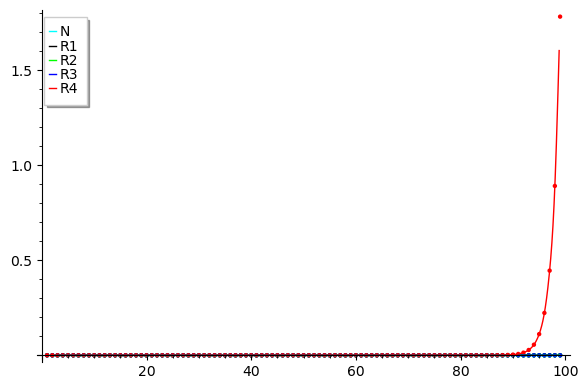

In [410]:
p0+p1+p2+p3+p4

In [351]:
2^17*1.3

170393.600000000

In [352]:
2^17

131072

In [356]:
(170393-53)/60

2839

In [358]:
(2839-19)/60

47

In [360]:
(47-23)/24

1

In [38]:
19+22+23

64

In [39]:
lcm(19,22)

418

In [40]:
create_LFSR_matrix(P1)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]